<a href="https://colab.research.google.com/github/aditisingh2912/Intro-to-CV/blob/main/OpenCV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

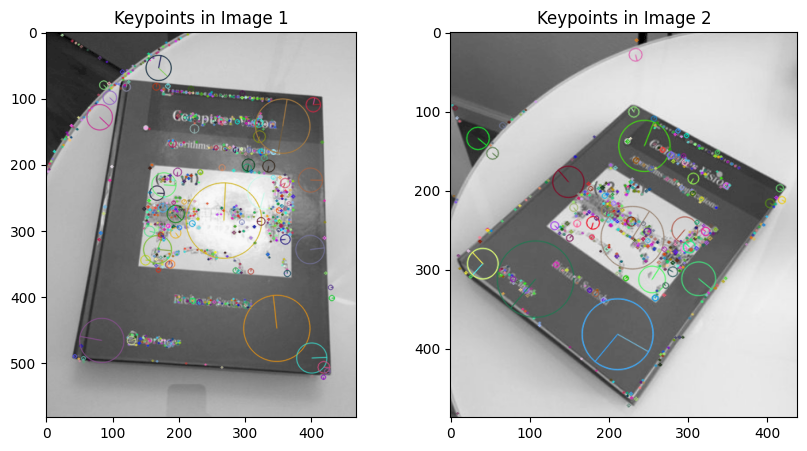

In [ ]:
#scale invariant feature transform
import cv2
import numpy as np
import matplotlib.pyplot as plt


img1 = cv2.imread("/content/image1.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("/content/image2.png", cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

img1_keypoints = cv2.drawKeypoints(img1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_keypoints = cv2.drawKeypoints(img2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img1_keypoints, cmap='gray')
plt.title("Keypoints in Image 1")

plt.subplot(1,2,2)
plt.imshow(img2_keypoints, cmap='gray')
plt.title("Keypoints in Image 2")

plt.show()


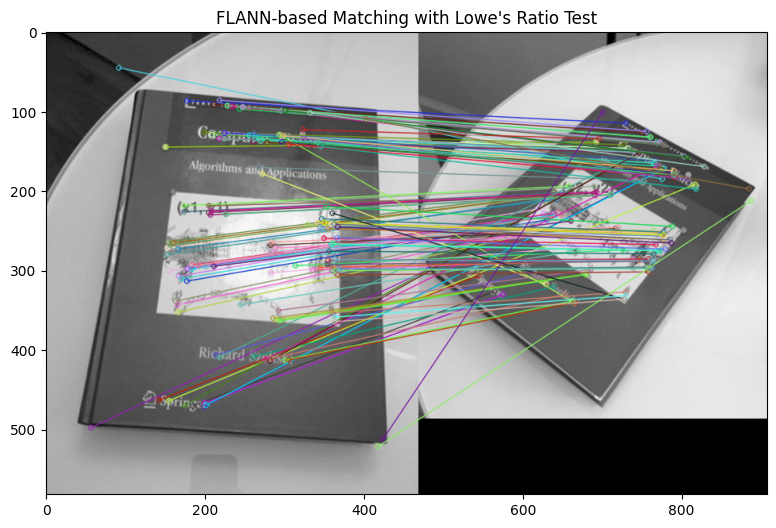

In [ ]:
index_params = dict(algorithm=1, trees=5)
search_params = dict(checks=100)  # Higher value = More accuracy but slower

#feature matching algorithm -
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:  # Lowe’s ratio test
        good_matches.append(m)

matched_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, None,
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(12, 6))
plt.imshow(matched_img)
plt.title("FLANN-based Matching with Lowe's Ratio Test")
plt.show()